# Predicting heart disease using machine learning

- this notebook used various python based ML nad Data Science libraries to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

#### 1. Problem Definition
In a statement, 
    Given clinical parameters about a patient, can we predict whether or not they have heart disease?
    
    
    
#### 2. Data 
- Original data is from the Cleveland data and from UCI Machine Learning Repository 
    - https://archive.ics.uci.edu/ml/datasets/heart+disease

- Downloaded in CSV format from Kaggle
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
    - includes data dictionary
 
#### 3. Evaluation   
- If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project


#### 4. Features

**Create a data dictionary**
 
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  - 0: Typical angina: chest pain related decrease blood supply to the heart
  - 1: Atypical angina: chest pain not related to heart
  - 2: Non-anginal pain: typically esophageal spasms (non heart related)
  - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
 - serum = LDL + HDL + .2 * triglycerides
 - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise (uncommon)
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


Note: Code update for next video
Hey, it's Daniel here,

Massive effort on making it to your first milestone project!

Just a quick note on the code in the upcoming video.

As of Scikit-Learn version 1.2+, plot_roc_curve is now RocCurveDisplay, you can see the documentation for this here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn-metrics-roccurvedisplay

This means if you're running Scikit-Learn version 1.2+, you'll see an error if you try to run plot_roc_curve.

Previous code (before Scikit-Learn version 1.2)

# this will error in Scikit-Learn version 1.2+
from sklearn.metrics import plot_roc_curve 
New code (after Scikit-Learn version 1.2)

# Available in Scikit-Learn version 1.2+
from sklearn.metrics import RocCurveDisplay 
How to check what Scikit-Learn version you're running

import sklearn
sklearn.__version__ # will print out the version number
How to update your Scikit-Learn version

Running this in your terminal with your Conda environment active will update Scikit-Learn to latest version (the -U stands for update).

pip install -U scikit-learn

More details

You can see more details about this on the course GitHub: https://github.com/mrdbourke/zero-to-mastery-ml/issues/45

Happy machine learning!

### Import all necessary tools

In [1]:
#Import EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#for plots to appear inside the notebook

#Models for Scikit-Lean

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve




### Exploring the Data

In [2]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

In [3]:
heart_disease.shape

(303, 14)

#Exploratory data analysis
- 1. What kinds of data do we have? 
- 2. Is there missing data?
- 3. What are the outliers?
- 4. How can you add, change or remove features to get more out of your data?




In [4]:
print(heart_disease.info())
print(heart_disease.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


1    165
0    138
Name: target, dtype: int64


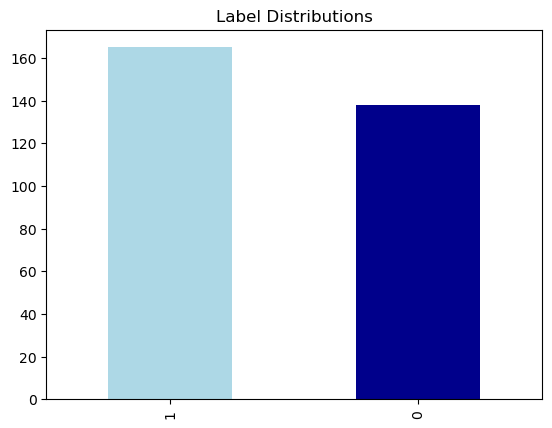

In [5]:

print(heart_disease["target"].value_counts())
heart_disease["target"].value_counts().plot(kind="bar",
                                           title = "Label Distributions",
                                           color = ('lightblue','darkblue'));

#observation: Our target classes are relatively balanced

# Finding patterns with in the Columns 

In [6]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Sex to Target comparison

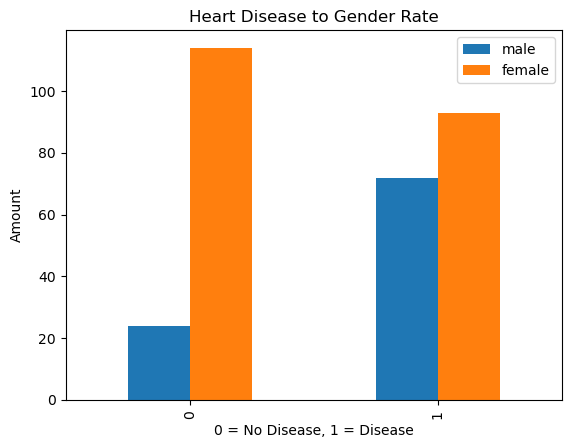

In [7]:
pd.crosstab(heart_disease.target, heart_disease.sex).plot.bar(
title = "Heart Disease to Gender Rate",
xlabel = "0 = No Disease, 1 = Disease",
ylabel = "Amount",
);
plt.legend(("male", "female"));
#plt.xticks(rotation = 0)

Key Notes:
- Dataset includes a 47% female to male ratio
- number of females with heart disease cover 1/3 of females without heart disease
- number of males with heart disease cover over 4/5 of males without heart disease
- Their average shows that a patient has about a 54%/60% chance of having heart disease
- 54%/60% can be considered as baseline score
    
    

### Age, Thalach (Max Heart Rate) to Target Comparison

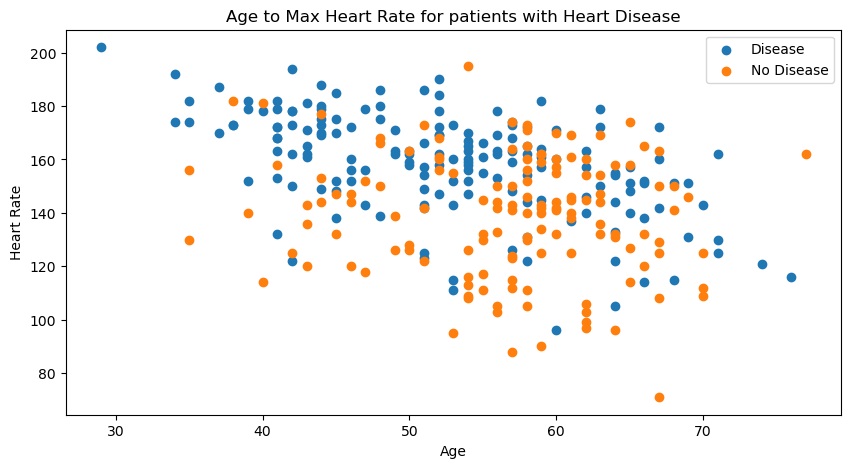

In [8]:
fig, ax0 = plt.subplots(figsize = (10,5))

#scatter age and thalach for patients with heart disease
ax0.scatter(heart_disease.age[heart_disease.target==1],heart_disease.thalach[heart_disease.target==1],     )            

#scatter age and thalach for patients without heart disease
ax0.scatter(heart_disease.age[heart_disease.target==0],heart_disease.thalach[heart_disease.target==0],     )


#customize scatter plot
ax0.set(title= "Age to Max Heart Rate for patients with Heart Disease", 
        xlabel="Age",
        ylabel="Heart Rate" 
       );


ax0.legend(("Disease","No Disease"));
       




#observation: Only possible note is that younger patients tend to have higher heart rates
            

### Plot age distribution to check for outliers

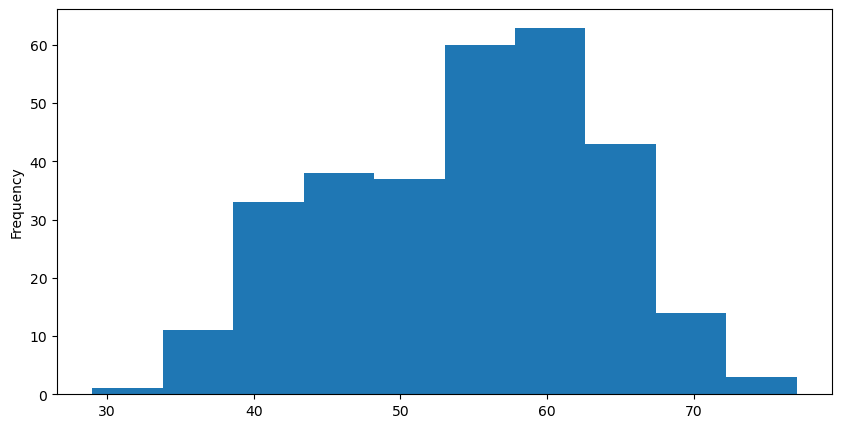

In [9]:
#plot age distribution 
heart_disease["age"].plot.hist(figsize = (10,5));

#observation: Looks like a normal distribution, bell curve.


#observation: 
- Looks like a normal distribution, bell curve.
    -  No outliers, data doesnt need to be removed
- Majority of the patients are 55-65 years of age



### Does chest pain type correlate with heart disease?

In [10]:
heart_disease["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [11]:
pd.crosstab(heart_disease["cp"], heart_disease["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


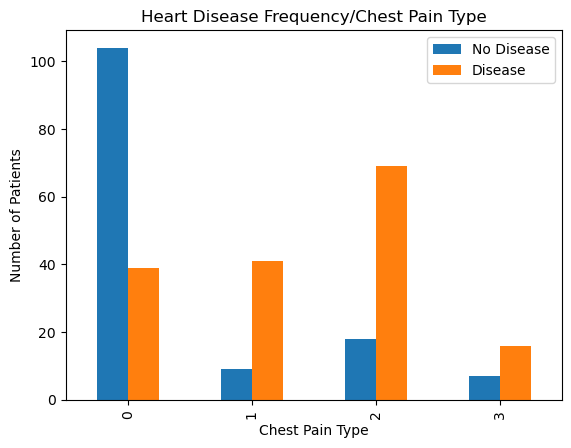

In [12]:
(pd.crosstab(heart_disease["cp"], heart_disease["target"])).plot.bar();

plt.title("Heart Disease Frequency/Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Patients")
plt.legend(("No Disease", "Disease"));


Observation: Suprisingly, majority of the patients stuggling with Non-anginal chest pain, (not heart related) have heart disease. 

### Create a Correlation Matrix

<Axes: >

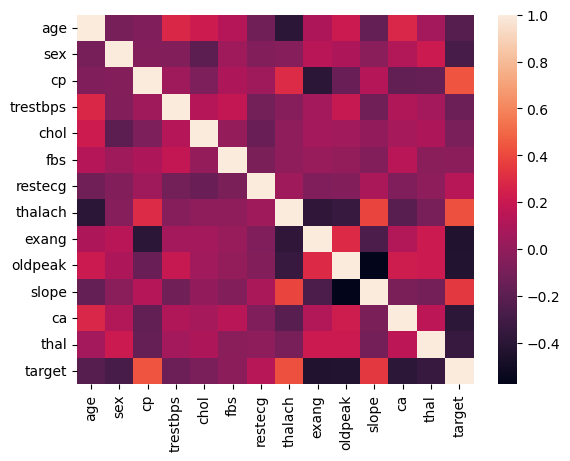

In [13]:
corr_mat=heart_disease.corr()
sns.heatmap(heart_disease.corr())

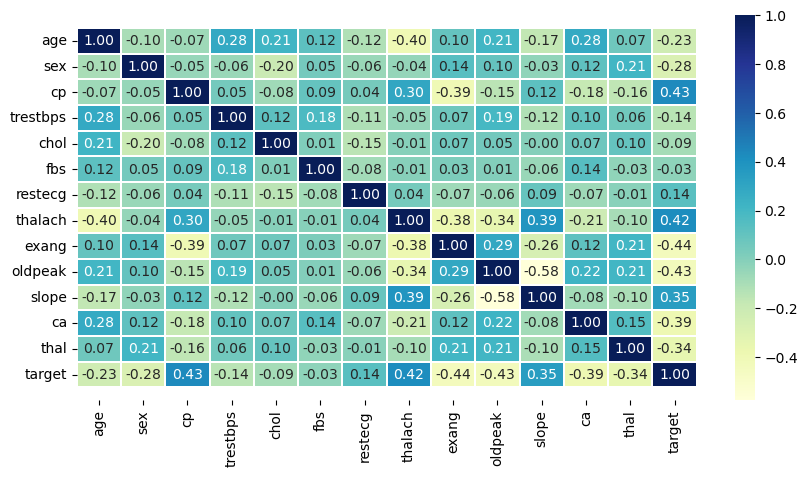

In [14]:
fig, ax = plt. subplots(figsize=(10,5))
ax = sns.heatmap(corr_mat,
           annot=True,
           linewidths=0.1,
           fmt = ".2f",
        cmap="YlGnBu"
        );
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

Oberservation 
- a higher positive value represents a higher correlation between the two features. (as one goes up, so does the other)
- a higher negative value represents a lower correlation bwtweeb the two features (as one goes down, so does the other)

### 5. Trying Models using Sklearn

Following Sklearn's Choosing right estimator map, models have been narrowed down to 
- KNeighbors Classifier
- Ensemble Classifier's - RandomForestClassifier

Upon further research on other potential models, another model discovered is
- Logistic Regression

In [15]:
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [17]:
len(X_train),len(y_train), len(X_test), len(y_test),X_train.shape

(242, 242, 61, 61, (242, 13))

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




In [19]:

models = {
    "Logistic_Regression": LogisticRegression(),
    "KNeighbors_Classifier": KNeighborsClassifier(),
    "RandomForest_Classifier": RandomForestClassifier()
}



In [25]:

def model_fit_and_score(models, X_train, y_train, X_test, y_test):
    
    
    '''
        Fits given Machine Learning models and returns evaluations.
        
        models: a dict containing sklearn ML models
        X_train: training features
        y_train: training labels
        X_test: testing features
        y_test: testing labels
        
    '''
    #Set random seed to initialize number generator
    np.random.seed(42)
    
    #Set empty dictionary to store model's scores
    model_scores = {}
    
    #Loops through the models 
    for name, model in models.items():
        
        #Fit the model to the training data
        model.fit(X_train,y_train)
        
        #Evaluate the model on testing data and append score to model scores
        model_scores[name] = model.score(X_test, y_test)
    
    return (model_scores)


In [26]:
model_scores_baseline= model_fit_and_score(models, X_train, y_train, X_test, y_test)


/Users/suranjitmohajan/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
model_comparison_results = pd.DataFrame(model_scores_baseline,
                                   index = ["Accuracy" ]
                               ).T
#stores the metrics in a DF Transposed




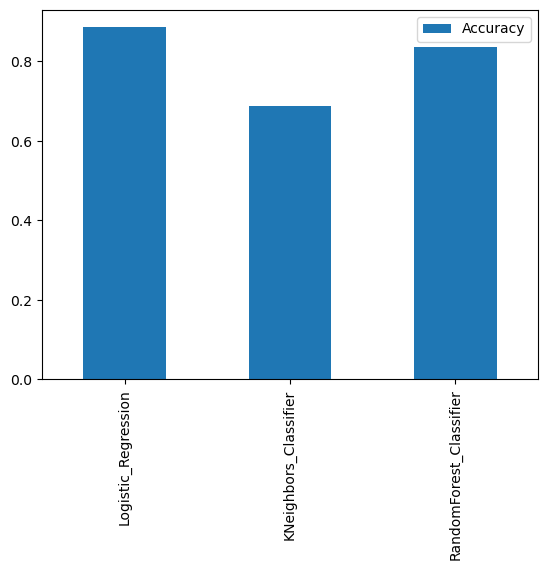

In [28]:
model_comparison_results.plot.bar();

It would appear that Logistic Regression yields the highest accuracy therefore we can consider it baseline and try fine tuning to improve it further. 

Lets look at the following:

- Hyperparameter tuning 
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 score
- Classification Report
- ROC Curve
- Area under the Curve



In [29]:
#model = KNeighborsClassifier()

list(np.random.randint(20, size=(1)))

[17]

In [30]:
model = KNeighborsClassifier()

model_scores_train = []
model_scores_test = []

for i in range(1,21):
    model.set_params(n_neighbors = i)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    model_scores_train.append(train_score)
    test_score = model.score(X_test, y_test)
    model_scores_test.append(test_score)
    #print(f"Model's result with n_neighbors {i} is on train data is {train_score}")
    #print(f"Model's result with n_neighbors {i} is on test data is {test_score}")

In [31]:
model_scores = pd.DataFrame([model_scores_train, model_scores_test],
                           index=["train", "test"],
                           columns=list(range(1,21))).T

KNN Model's best sore on test dat was 75.41%


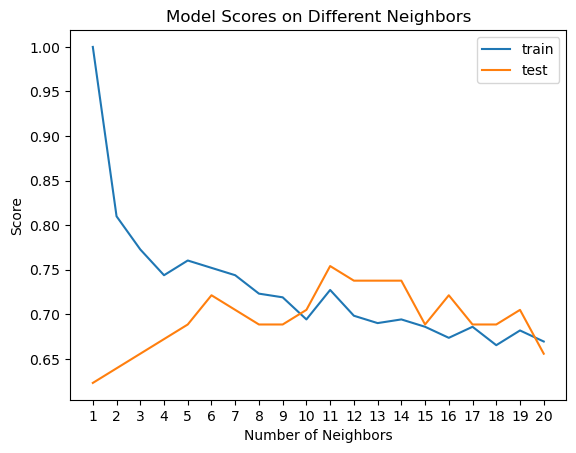

In [32]:
(model_scores).plot();
plt.title("Model Scores on Different Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.xticks(range(1,21));

print(f"KNN Model's best sore on test dat was {max(model_scores_test)*100:.2f}%"
     
     )

In [33]:
grid = {
    "n_neighbors":[1,2,4,8,10,11,13,15],
    "weights":['uniform'],
    "algorithm":['auto'],
    "leaf_size":[30],
    "p":[2],
    "metric":['minkowski'],
   # "metric_params":None,
    #"n_jobs":None,
}

In [34]:
clf = KNeighborsClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=1, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=30, metric=minkowski, n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=3

/Users/suranjitmohajan/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=1),
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'n_neighbors': [1, 2, 4, 8, 10, 11, 13,
                                                        15],
                                        'p': [2], 'weights': ['uniform']},
                   verbose=2)

In [35]:
rs_clf.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 13,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'auto'}

In [36]:
rs_clf.score(X_test, y_test)

0.7377049180327869

### Key Note: 
- Despite hypertuning the KN model, its best results on test data is not up the standards for this problem. 

### Hypertuning using RandomizedSearchCV
 - RandomForestClassifier
 - Logistics Regressor
 

### Tuning Hyperparamers of Logistics Regressor

In [37]:
#create hyperparameter grid 

grid_log_reg = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

In [38]:

 
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(

estimator=LogisticRegression(),
param_distributions=grid_log_reg,
n_iter=20,
n_jobs=1,
cv=5,
verbose=False
    
)

In [39]:
rs_log_reg.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=False)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
#rs_log_reg.score(X_train,y_train)
rs_log_reg.score(X_test,y_test)

0.8852459016393442

#### Observation: Finetuning only two parameters from the Linear Regressor model, it is able to match our baseline model score

### Tuning Hyperparamers of RandomForestClassifier

In [42]:
#create hyperparameter grid 

grid_rf_clf = {
        "n_estimators": np.arange(0,1000, 50),
           "max_depth": [1, 3, 5, 10, 15, None],
           "min_samples_split": np.arange(2,10, 2),
           "min_samples_leaf":  np.arange(1,10, 1)
}

In [46]:
np.random.seed(42)

rs_rf_clf = RandomizedSearchCV(

estimator=RandomForestClassifier(),
param_distributions=grid_rf_clf,
n_iter=20,
n_jobs=1,
cv=5,
verbose=False
    
)

In [47]:
rs_rf_clf.fit(X_train, y_train)

/Users/suranjitmohajan/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/suranjitmohajan/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/suranjitmohajan/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/suranjitmohajan/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/base.py", line

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [1, 3, 5, 10, 15, None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
       650, 700, 750, 800, 850, 900, 950])},
                   verbose=False)

In [55]:
rs_rf_clf.best_params_

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_depth': 1}

In [56]:
rs_rf_clf.score(X_test,y_test)

0.8688524590163934

In [57]:
#scores of our baseline models

model_scores_baseline

{'Logistic_Regression': 0.8852459016393442,
 'KNeighbors_Classifier': 0.6885245901639344,
 'RandomForest_Classifier': 0.8360655737704918}

### Observation: 
- Tuning hyperparameters has beat the original baseline Random Forest classifer but not Logistic_Regression. 

- we can try finetuning Logistic_Regression model further with using GridSearchCV to test all parameter possibilities. 


#### Since tuning Hyperparameters of the LogisticRegression models hasa yielded results closest to our baseline, we can try experimenting to tune it further, using GridSearchCV

In [58]:
grid_log_reg = {
    "C": np.logspace(-4, 4, 50), #length of "C" values changed to 50 
    "solver": ["liblinear"],
    
}

gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=grid_log_reg,
                          cv = 5,
                          n_jobs=11
                        
)

In [59]:
gs_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=11,
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'solver': ['liblinear']})

In [60]:
gs_log_reg.best_params_

{'C': 0.18420699693267145, 'solver': 'liblinear'}

In [64]:
gs_log_reg.score(X_test, y_test) == model_scores_baseline["Logistic_Regression"]

True

### Despite finetuning the hyperparameters of our Logistic Regression using GridSearchCV from our grid, its still unable to outperform its baseline. 

Model evaluations



Model evaluations using metrics

In order to use the metric, we have to make predictions using our model

- ROC curve and AUC score
- Confusion matrix
- Classification RPT
- Precision
- Recall
- F1-score

Use CV where possible


In [65]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [66]:
#plot a roc cuve


from sklearn.metrics import RocCurveDisplay


In [67]:
roc_curve(gs_log_reg, X_test, y_test); 

TypeError: roc_curve() takes 2 positional arguments but 3 were given

#### We can create a function that plots confusion matrix using parameters
-  X, y

In [ ]:
def plot_conf_mat(y_true,y_preds):
    
    '''
        Plots a confusion matrix using Seaborn
    '''
    fig, ax = plt.subplots(figsize = (5,4))

    ax = sns.heatmap(confusion_matrix(y_true, y_preds),
                    annot=True #shows the counts 
                    );

    ax.set(
        xlabel = "True label", #sets true labels on X axis
        ylabel="Predicted label" #sets predictions on y axis
    );

In [ ]:
plot_conf_mat(y_test,y_preds)

Build a classification report
- cross-validated precision, 
- recall 
- f1-score.

accuracy - the percent of the predicted labels the same as the acutal label (coef of determination) 

precision - evaluates class one. (false postive/true positive)
    a model with no false positives will have a precision on 1
    (bottom left of conf matrix)
   

recall - false negatives - a model with no false negatives will have a recall of 1 (top right of conf matrix)

f1 - is a combination of precision and recall (if precision and recall  = 1, f1 is also 1)

support - num of values per class


macro avg = avg of precision, recall and f1 score between classes
    - takes the class imbalance into account
 
weighted avg = avg of precision, recall and f1 score between classes
    - takes the class imbalance into account and favors the class with higher samples


In [ ]:
class_rpt = classification_report(y_test, y_preds)
print(class_rpt)

The accuracy, precision, recall and f1-score shown here are only from test sets. A more accurate representation of these metrics can be done through cross validation using cross_val_score.


Key note:

#### Reinstantiate Logistic Regression model using the parameters with best results from our Grid Search Cross Validation


In [ ]:

clf = LogisticRegression(
    
C = 0.18420699693267145, 
solver =  'liblinear'
    
)

In [ ]:
cv_acc = np.mean(cross_val_score(clf, X, y, scoring="accuracy"))

In [ ]:
#precision

cv_precision = np.mean(cross_val_score(gs_log_reg, X, y, scoring="precision"))

In [ ]:
cv_recall = np.mean(cross_val_score(gs_log_reg, X, y, scoring="recall"))

In [ ]:
cv_f1 = np.mean(cross_val_score(gs_log_reg, X, y, scoring="f1"))

In [ ]:
gs_log_reg.best_params_

In [ ]:
cv_acc, cv_precision, cv_recall, cv_f1

In [ ]:
#Plot a bar graph displaying the scores

cv_scores = []
cv_scores.append([cv_acc, cv_precision, cv_recall, cv_f1])

In [ ]:
cv_scores_df = pd.DataFrame(cv_scores,
                           columns=["Accuracy", "Precision", "Recall", "F1"]
                           ).T
                                    

In [ ]:
cv_scores_df.plot.bar(legend = False,
                     title = "Cross Validated Classification Metrics");

### Calculate Feature Importance
- Which features contributed the most to the outcomes of the model and how did contribute?

In [ ]:
cv_metrics = pd.DataFrame({
    "accuray": cv_acc,
    "precision": cv_precision,
    "recall": cv_recall,
    "f1": cv_f1
}, index=[0])

In [ ]:
cv_metrics

In [ ]:
clf = LogisticRegression(
    
C = 0.18420699693267145, 
solver =  'liblinear'
)
clf.fit(X_train, y_train);
features_vals = clf.coef_

create a dictionary containing coef values along with their columns

In [ ]:
col_names = list(X.columns)

In [ ]:
feature_importance = pd.DataFrame(features_vals,
            columns=col_names).T

In [ ]:
feature_importance.plot.bar(legend = False);
feature_importance

Key notes:

- negative correlation
 - When the value is negative, there is a negative correlation. Therefore when the value for sex increases(chances of being a male), the chances of having heart disease decreases. 
 - This correlates with what we see in the crosstab


- positive correlation
    - slope(heart pain when exercising to chances of heart disease)
    postive correalation makes sense as peoples conditions with more pain when exercising also have a higher chance of having heart disease
    
  - features with close to 0 coef are potential features to be removed from the data assuming acquring that feature is difficult



In [ ]:
pd.crosstab(heart_disease["sex"], heart_disease["target"])
pd.crosstab(heart_disease["slope"], heart_disease["target"]).plot()

the data from feature importance in comparison to data from correlation matrix shows model driven exploratory analysis. The data from feature import is shows how it contributes to calculating the target 

slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart

### Exporting and sharing our current model

#### Observation
- We didnt hit our goal of 95% but we did get close with accuracy of 84% with cross validation. 
    - We now have an understanding of which features are and which features are not so valuable.
    
#### Experimentaion

If you havent hit the evaluation metric yet...What else can be done to improve the score?
   
   - Could we collect more data?
   - could we try a better model? (catboost, XGBoost)
   - Could we improve the current models? beyond what we've. done so far?
   
   
If our model is good enough and we've managed to hit the evalution metric, how can we export and share it?
   
    
    
   